In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
# Specific sklearn ones
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

In [2]:
#Importing training data
file_features_training = 'RadiomicsFeatures_training.csv'
features_training      = pd.read_csv(file_features_training)

file_response_training = 'Response_training.csv'
responses_training_     = pd.read_csv(file_response_training)
responses_training     = np.ravel(responses_training_, order='C')

#Importing testing data
file_features_testing  = 'RadiomicsFeatures_testing.csv'
features_testing       = pd.read_csv(file_features_testing)

file_response_testing  = 'Response_testing.csv'
responses_testing_      = pd.read_csv(file_response_testing)
responses_testing      = np.ravel(responses_testing_, order='C')

In [3]:
#Importing internal discovery training data
file_new_train_set = 'new_train_set.csv'
new_train_set = pd.read_csv(file_new_train_set)

file_new_train_features = 'new_train_features.csv'
new_train_features = pd.read_csv(file_new_train_features)

#Importing internal discovery testing data
file_new_test_set = 'new_test_set.csv'
new_test_set = pd.read_csv(file_new_test_set)

file_new_test_features = 'new_test_features.csv'
new_test_features = pd.read_csv(file_new_test_features)

Now that we have chosen our model. We are able to evalute the model and describe what the model is showing us, much like the graph in the previous notebook. Below is function that evaluates all the metrics that we should consider in Machine Learning.

In [4]:
def Confuse_Summary(true_results, predicted_results):
    # Calculate the confusion matrix
    cm = confusion_matrix(true_results, predicted_results)

    # Extract TP, FP, TN, FN from the confusion matrix
    TP = cm[1, 1]
    FP = cm[0, 1]
    TN = cm[0, 0]
    FN = cm[1, 0]

    # Calculate metrics
    accuracy = accuracy_score(true_results, predicted_results)
    auc = roc_auc_score(true_results, predicted_results)
    precision = precision_score(true_results, predicted_results)
    recall = recall_score(true_results, predicted_results)
    specificity = TN / (TN + FP)
    f1 = f1_score(true_results, predicted_results)
    
     # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted responses')
    plt.ylabel('True responses')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Print the metrics
    print("Accuracy:", accuracy)
    print("Auc:", auc)
    print("Precision:", precision)
    print("Recall (Sensitivity):", recall)
    print("Specificity:", specificity)
    print("F1-score:", f1)

Here is the metrics being applied to the model when it is trained and tested in the discovery set and also when it is trained on discovery and tested on the external set.

### Performance of the dicovery set

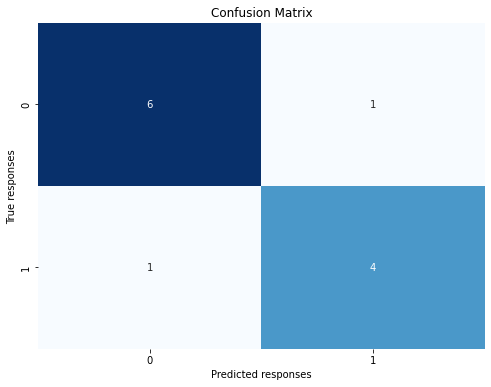

Accuracy: 0.8333333333333334
Auc: 0.8285714285714286
Precision: 0.8
Recall (Sensitivity): 0.8
Specificity: 0.8571428571428571
F1-score: 0.8000000000000002


In [5]:
rfc = RandomForestClassifier(max_depth=4, n_estimators=40, random_state=20)

rfc.fit(new_train_features, np.ravel(new_train_set, order='C'))
Confuse_Summary(new_test_set, rfc.predict(new_test_features))

### Performance of the external set

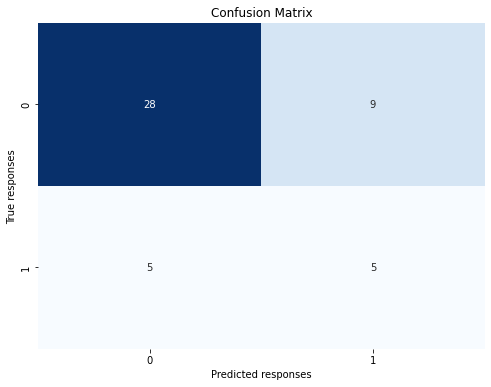

Accuracy: 0.7021276595744681
Auc: 0.6283783783783784
Precision: 0.35714285714285715
Recall (Sensitivity): 0.5
Specificity: 0.7567567567567568
F1-score: 0.41666666666666663


In [6]:
rfc.fit(features_training, responses_training)
Confuse_Summary(responses_testing, rfc.predict(features_testing))

Now we can graphically illustrate the AUC, sensitivity and specificity through a ROC curve. We will be able to see that the curve of the dicovery set performs better than that of the external test set.

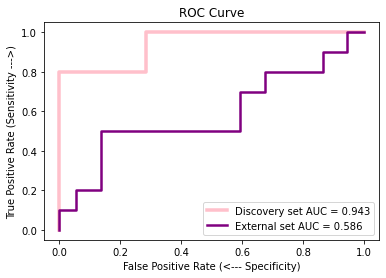

In [7]:
# For Discovery Set
rfc = RandomForestClassifier(max_depth=4, n_estimators=40, random_state=20)
rfc.fit(new_train_features, np.ravel(new_train_set, order='C'))
y_pred_proba_discovery = rfc.predict_proba(new_test_features)[:, 1]
fpr_discovery, tpr_discovery, _ = roc_curve(new_test_set, y_pred_proba_discovery)
plt.plot(fpr_discovery, tpr_discovery, label=f"Discovery set AUC = {roc_auc_score(new_test_set, y_pred_proba_discovery):.3f}", linewidth=3.5, color='pink')

# For External Set
# Assuming external_train_features, external_train_set, external_test_features, external_test_set are your external set data
rfc.fit(features_training, responses_training)
y_pred_proba_external = rfc.predict_proba(features_testing)[:, 1]
fpr_external, tpr_external, _ = roc_curve(responses_testing, y_pred_proba_external)
plt.plot(fpr_external, tpr_external, label=f"External set AUC = {roc_auc_score(responses_testing, y_pred_proba_external):.3f}", linewidth=2.5, color='purple')

# Plot settings
plt.xlabel('False Positive Rate (<--- Specificity)')
plt.ylabel('True Positive Rate (Sensitivity --->)')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.savefig('figureROC.png', dpi=300, transparent=True)
plt.show()